# Datacamp Series 10 - Big Data Certification Project (Data Hackathon) 

### Group 6

- NUR IZZAH BINTI ABD MONIR (2021826376) *

- BONAVENTURE ANDREW @ ILUP (2021610072)

- NIXON NYANGAU BIN MOHD SALHIN (2022855916)

- IQBAL HADIF BIN RASDAN (2021869076)

- ADBUL HAZIM BIN JAHIDI (2021822834)

- NURIZZATI BINTI MOHAMAD (2021886414)

### Objectives

- Conduct Exploratory Data Analysis (EDA): Perform EDA to understand the distribution and relationships between variables from the data

- Analyzing Absenteeism Dataset is to identify the patterns

- Developing an AI application that can predict the category of absence

- Bonus produce two additional pieces of information that provide valuable insights

In [ ]:
# Prepare Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filename = "Absenteeism_at_work_dataset2024.csv"
df = pd.read_csv(filename)# Load Dataset
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,#,7.0,3,1,289.0,36,13.0,33,"239,554",...,0.0,#,2,1.0,#,1.0,90.0,172,30,4
1,2,0,NaN,#,1,118.0,13,18.0,#,"239,554",...,1.0,#,1,1.0,0,0.0,98.0,NaN,31,0
2,3,NaN,NaN,4,1,179.0,#,18.0,38,NaN,...,NaN,1,0,1.0,0,NaN,89.0,170,31,2
3,4,7,7.0,5,1,279.0,5,14.0,39,NaN,...,0.0,1,2,NaN,1,0.0,68.0,168,#,4
4,5,23,7.0,5,1,289.0,36,NaN,33,"239,554",...,0.0,1,#,1.0,0,1.0,90.0,NaN,30,2


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8854 entries, 0 to 8853
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               8854 non-null   int64  
 1   Reason for absence               8770 non-null   object 
 2   Month of absence                 8804 non-null   float64
 3   Day of the week                  8838 non-null   object 
 4   Seasons                          8854 non-null   int64  
 5   Transportation expense           8836 non-null   float64
 6   Distance from Residence to Work  8854 non-null   object 
 7   Service time                     8838 non-null   float64
 8   Age                              8854 non-null   object 
 9   Work load                        8765 non-null   object 
 10  Hit target                       8854 non-null   int64  
 11  Disciplinary failure             8838 non-null   float64
 12  Education           

In [ ]:
print(df.describe())

                ID  Month of absence      Seasons  Transportation expense  \
count  8854.000000       8804.000000  8854.000000             8836.000000   
mean   4427.500000          6.097229     2.638694              205.820733   
std    2556.073975          2.988082     0.984529               69.099728   
min       1.000000          0.000000     1.000000              118.000000   
25%    2214.250000          4.000000     2.000000              155.000000   
50%    4427.500000          6.000000     3.000000              225.000000   
75%    6640.750000          8.000000     3.000000              246.000000   
max    8854.000000         12.000000     4.000000              388.000000   

       Service time   Hit target  Disciplinary failure  Social drinker  \
count   8838.000000  8854.000000           8838.000000     8804.000000   
mean      13.092781    94.764852              0.040959        0.586892   
std        4.454641     3.388181              0.198208        0.492420   
min       

### Question 1: Summarize the count of missing (null/NaN) values, including the data noise transformed from
"#," in each column.

In [ ]:
filename = "Absenteeism_at_work_dataset2024.csv"
df = pd.read_csv(filename)# Load Dataset

#Convert all # into NaN
df.replace('#', np.nan, inplace=True)

# Check for null/missing value in the dataset
print(df.isnull().sum())

ID                                   0
Reason for absence                 101
Month of absence                    50
Day of the week                     17
Seasons                              0
Transportation expense              18
Distance from Residence to Work    380
Service time                        16
Age                                  1
Work load                          224
Hit target                           0
Disciplinary failure                16
Education                           20
Son                                 16
Social drinker                      50
Social smoker                        1
Pet                                 32
Weight                              27
Height                              75
Body mass index                     16
Absenteeism time in hours            0
dtype: int64


### Data Cleaning 

In [ ]:

print(df.isnull().sum())

ID                                   0
Reason for absence                 101
Month of absence                    50
Day of the week                     17
Seasons                              0
Transportation expense              18
Distance from Residence to Work    380
Service time                        16
Age                                  1
Work load                          224
Hit target                           0
Disciplinary failure                16
Education                           20
Son                                 16
Social drinker                      50
Social smoker                        1
Pet                                 32
Weight                              27
Height                              75
Body mass index                     16
Absenteeism time in hours            0
dtype: int64


In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,NaN,7.0,3,1,289.0,36,13.0,33,"239,554",...,0.0,NaN,2,1.0,NaN,1.0,90.0,172,30,4
1,2,0,NaN,NaN,1,118.0,13,18.0,NaN,"239,554",...,1.0,NaN,1,1.0,0,0.0,98.0,NaN,31,0
2,3,NaN,NaN,4,1,179.0,NaN,18.0,38,NaN,...,NaN,1,0,1.0,0,NaN,89.0,170,31,2
3,4,7,7.0,5,1,279.0,5,14.0,39,NaN,...,0.0,1,2,NaN,1,0.0,68.0,168,NaN,4
4,5,23,7.0,5,1,289.0,36,NaN,33,"239,554",...,0.0,1,NaN,1.0,0,1.0,90.0,NaN,30,2


In [ ]:
# COLUMN 1
df['Reason for absence'] = pd.to_numeric(df['Reason for absence'], errors='coerce')

median_value = df['Reason for absence'].median()

df['Reason for absence'] = df['Reason for absence'].fillna(median_value)


In [ ]:
# COLUMN 2
df['Month of absence'].replace(0, np.nan, inplace=True)
df['Month of absence'] = df.groupby('Seasons')['Month of absence'].ffill()

In [ ]:
# COLUMN 3
mode_value = df['Day of the week'].mode()[0]
df['Day of the week'] = df['Day of the week'].fillna(mode_value)

In [ ]:
# COLUMN 5
median_value = df['Transportation expense'].median()
df['Transportation expense'] = df['Transportation expense'].fillna(median_value)

In [ ]:
# COLUMN 6
mode_value = df['Distance from Residence to Work'].mode()[0]
df['Distance from Residence to Work'] = df['Distance from Residence to Work'].fillna(mode_value)

In [ ]:
# COLUMN 8
mode_value = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(mode_value)

In [ ]:
# COLUMN 7
mode_value = df['Service time'].mode()[0]
df['Service time'] = df['Service time'].fillna(mode_value)

In [ ]:
# COLUMN 9
mode_value = df['Work load'].mode()[0]
df['Work load'] = df['Work load'].fillna(mode_value)

In [ ]:
# COLUMN 11
mode_value = df['Disciplinary failure'].mode()[0]
df['Disciplinary failure'] = df['Disciplinary failure'].fillna(mode_value)

In [ ]:
# COLUMN 12
mode_value = df['Education'].mode()[0]
df['Education'] = df['Education'].fillna(mode_value)

In [ ]:
# COLUMN 13
mode_value = df['Son'].mode()[0]
df['Son'] = df['Son'].fillna(mode_value)

In [ ]:
# COLUMN 14
mode_value = df['Social drinker'].mode()[0]
df['Social drinker'] = df['Social drinker'].fillna(mode_value)

In [ ]:
# COLUMN 15
mode_value = df['Social smoker'].mode()[0]
df['Social smoker'] = df['Social smoker'].fillna(mode_value)

In [ ]:
# COLUMN 16
mode_value = df['Pet'].mode()[0]
df['Pet'] = df['Pet'].fillna(mode_value)

In [ ]:
# COLUMN 17
median_value = df['Weight'].median()
df['Weight'] = df['Weight'].fillna(median_value)

In [ ]:
# COLUMN 18
mode_value = df['Height'].mode()[0]
df['Height'] = df['Height'].fillna(mode_value)

In [ ]:
# COLUMN 19
mode_value = df['Body mass index'].mode()[0]
df['Body mass index'] = df['Body mass index'].fillna(mode_value)

### Turn all column from str into int for ML 

In [ ]:
df['Work load'] = df['Work load'].str.replace(',', '').astype(int)
df['Day of the week'] = df['Day of the week'].astype(int)
df['Distance from Residence to Work'] = df['Distance from Residence to Work'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Education'] = df['Education'].astype(int)
df['Son'] = df['Son'].astype(int)
df['Social smoker'] = df['Social smoker'].astype(int)
df['Height'] = df['Height'].astype(int)
df['Body mass index'] = df['Body mass index'].astype(int)

### Categorizing Absenteeism time in hours

In [ ]:
def categorize_hours(hours):
    if hours <= 4:
        return 1  
    elif hours <= 72:
        return 2  
    else:
        return 3 

# Apply the function to the column
df['Absenteeism Category'] = df['Absenteeism time in hours'].apply(categorize_hours)

df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism Category
0,1,19.0,7.0,3,1,289.0,36,13.0,33,239554,...,1,2,1.0,0,1.0,90.0,172,30,4,1
1,2,0.0,7.0,5,1,118.0,13,18.0,28,239554,...,1,1,1.0,0,0.0,98.0,178,31,0,1
2,3,19.0,7.0,4,1,179.0,26,18.0,38,275089,...,1,0,1.0,0,0.0,89.0,170,31,2,1
3,4,7.0,7.0,5,1,279.0,5,14.0,39,275089,...,1,2,1.0,1,0.0,68.0,168,31,4,1
4,5,23.0,7.0,5,1,289.0,36,18.0,33,239554,...,1,1,1.0,0,1.0,90.0,178,30,2,1
5,6,19.0,7.0,6,1,179.0,51,18.0,38,239554,...,1,0,1.0,0,0.0,89.0,170,31,2,1
6,7,22.0,7.0,6,1,361.0,52,3.0,28,239554,...,1,1,1.0,0,4.0,80.0,172,27,8,2
7,8,23.0,7.0,5,1,260.0,26,11.0,36,239554,...,1,4,1.0,0,0.0,65.0,168,23,4,1
8,9,19.0,7.0,2,1,155.0,12,14.0,34,239554,...,1,2,1.0,0,0.0,95.0,178,25,40,2
9,10,22.0,7.0,2,1,235.0,11,14.0,37,239554,...,3,1,0.0,0,1.0,88.0,172,29,8,2


In [ ]:
# AFTER DATA CLEANING

# Check for null/missing value in the dataset
print(df.isnull().sum())

# Save the cleaned dataset (FOR FUTURE USE)
df.to_csv('aftercleaning.csv', index=False)

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load                          0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
Absenteeism Category               0
dtype: int64


### Question 2: Calculate the average values for the 'Hit target' and 'Workload' columns. State the results.

In [ ]:
avg_hit_target = round(df['Hit target'].mean(), 2)
print("Average Hit Target: ", avg_hit_target)

Average Hit Target:  94.76


In [ ]:
avg_workload = round(df['Work load'].mean(), 2)
print("Average Workload: ", avg_workload)

Average Workload:  271265.64


### Question 3: Determine the number of employees in each absenteeism category and visualize the information using a bar chart.

In [ ]:
time_slip_count = df[df['Absenteeism time in hours'] <= 4].shape[0]
mc_count = df[(df['Absenteeism time in hours'] > 4) & (df['Absenteeism time in hours'] <= 72)].shape[0]
abnormal_count = df[df['Absenteeism time in hours'] > 72].shape[0]

# Print counts
print(f"Time Slip : {time_slip_count}")
print(f"MC : {mc_count}")
print(f"Abnormal : {abnormal_count}")

Time Slip : 5531
MC : 3242
Abnormal : 81


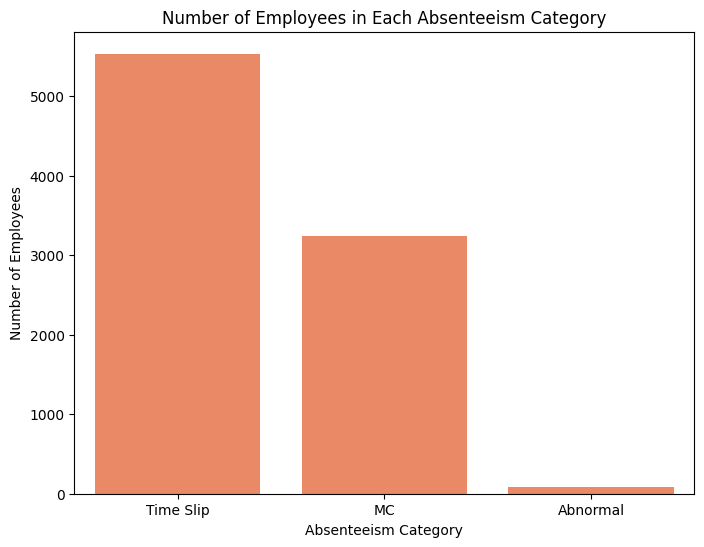

In [ ]:
absenteeism_mapping = {1: 'Time Slip', 2: 'MC', 3: 'Abnormal'}
df['Absenteeism Category'] = df['Absenteeism Category'].map(absenteeism_mapping)

absenteeism_counts = df['Absenteeism Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=absenteeism_counts.index,y=absenteeism_counts.values,color="coral")
plt.title('Number of Employees in Each Absenteeism Category')
plt.xlabel('Absenteeism Category')
plt.ylabel('Number of Employees')
plt.show()

### Question 4: Identify employee records with an abnormal status, and create a new CSV file to store this information. 

In [ ]:
# Identify records with 'Abnormal' status
abnormal_df = df[df['Absenteeism Category'] == 'Abnormal']

# Save these records to a new CSV file
abnormal_df.to_csv('abnormal_absenteeism_records.csv', index=False)

### Question 5: Identify the number of employees aged 35 and below who live 50KM or more from work and have taken MC. Represent this proportion in comparison to the total population using a pie chart.

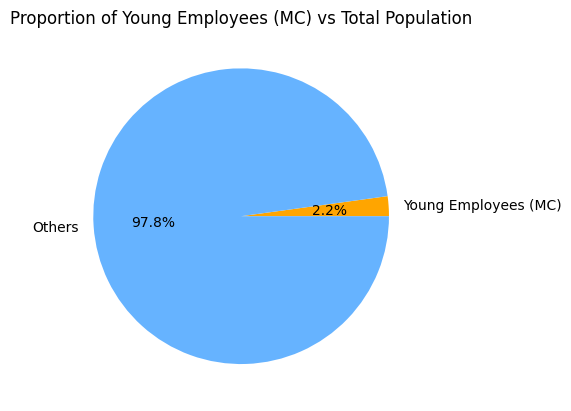

Total population: 8854
Total number of Others: 8662
Young employees (MC): 192


In [ ]:
# Filter employees aged 35 and below, living 50KM or more from work, and have taken MC
filename = "aftercleaning.csv"
df = pd.read_csv(filename)# Load Dataset

youngEmployees_MC = df[(df['Age'] <= 35) & 
                        (df['Distance from Residence to Work'] >= 50) & 
                        (df['Absenteeism Category'] == 2)]

# Calculate the proportion
total_population = len(df)
young_MC_count = len(youngEmployees_MC)
others_count = total_population - young_MC_count

# Create a pie chart
labels = ['Young Employees (MC)', 'Others']
sizes = [young_MC_count, others_count]
colors = ['orange','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%')
plt.title('Proportion of Young Employees (MC) vs Total Population')
plt.show()

print(f"Total population: {total_population}")
print(f"Total number of Others: {others_count}")
print(f"Young employees (MC): {young_MC_count}")

### Question 6: Analyse if the number of sons is influenced by age. If so, show the strength and type of relationship (positive or negative) using an appropriate chart.

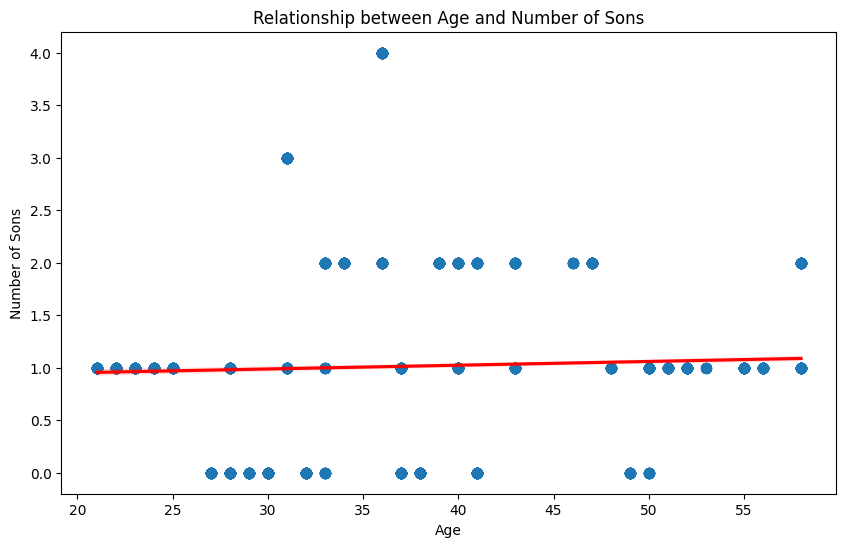

Correlation between Age and Number of Sons: 0.03


In [ ]:
filename = "aftercleaning.csv"
df = pd.read_csv(filename)# Load Dataset

# Scatter plot to visualize the relationship between Age and the number of sons
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Son', data=df, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Relationship between Age and Number of Sons')
plt.xlabel('Age')
plt.ylabel('Number of Sons')
plt.show()

# Calculate the correlation coefficient
correlation = df['Age'].corr(df['Son'])
print(f"Correlation between Age and Number of Sons: {correlation:.2f}")

### Question 7: Determine if BMI has a strong relationship with age. Describe the strength and type of the
relationship (positive or negative) using an appropriate chart.

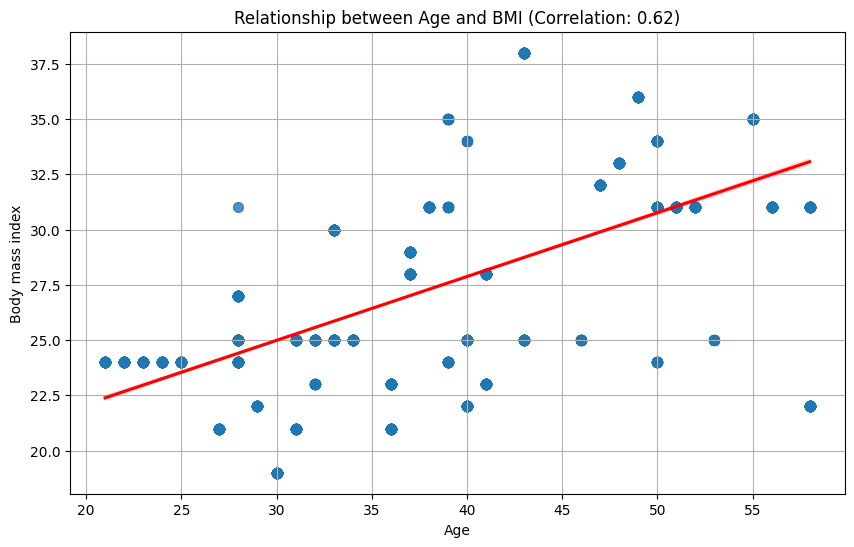

Correlation between Age and BMI: 0.62


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "aftercleaning.csv"
data = pd.read_csv(file_path)

# Question 7: Relationship between BMI and Age
# Calculate correlation coefficient
correlation = data['Body mass index'].corr(data['Age'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Body mass index', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Relationship between Age and BMI (Correlation: {correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Body mass index')
plt.grid(True)
plt.show()

# Print correlation coefficient
print(f'Correlation between Age and BMI: {correlation:.2f}')

### Question 8: Calculate the average range for 'Transportation expense' and represent it using a histogram with the mean line included.

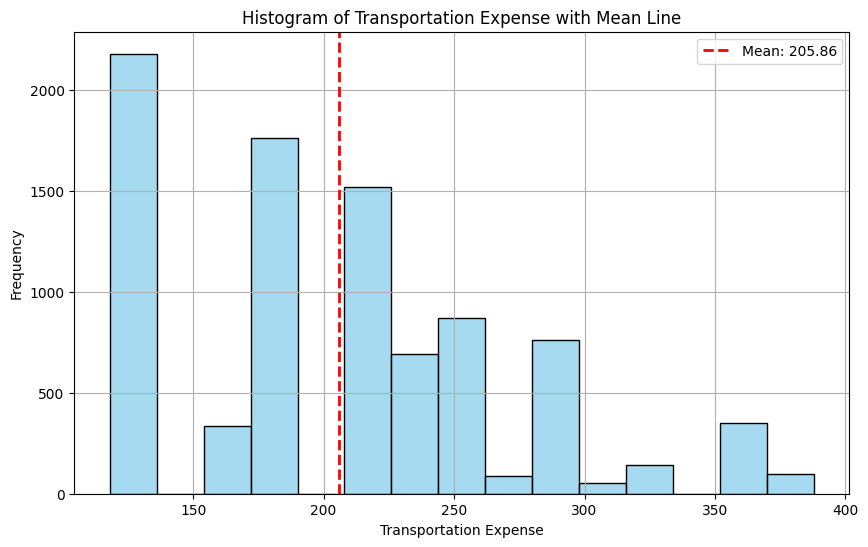

Mean Transportation Expense: 205.86


In [ ]:
# Calculate the mean of 'Transportation expense'
mean_transport_expense = data['Transportation expense'].mean()

# Create histogram with mean line
plt.figure(figsize=(10, 6))
sns.histplot(data['Transportation expense'], kde=False, color='skyblue', bins=15)

# Add a line for the mean
plt.axvline(mean_transport_expense, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_transport_expense:.2f}')

plt.title('Histogram of Transportation Expense with Mean Line')
plt.xlabel('Transportation Expense')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Print mean transportation expense
print(f'Mean Transportation Expense: {mean_transport_expense:.2f}')

### Split dataset into two groups: one for training and the other for testing. 

Using the following code to perform the split: 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=0, shuffle=True) 

In [ ]:
import pandas as pd
filename = "aftercleaning.csv"
df = pd.read_csv(filename)# Load Dataset

# List 19 features in the desired order
selected_features = [
    'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
    'Transportation expense', 'Distance from Residence to Work', 'Service time',
    'Age', 'Work load', 'Hit target', 'Disciplinary failure', 'Education',
    'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
    'Body mass index'
]

# Ensure that X contains all the selected features
X = df[selected_features]
y = df['Absenteeism Category']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True) 
print(X_train.shape)
print(X_test.shape)


(7083, 19)
(1771, 19)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Question 9: What is the accuracy of the model on the training data and the testing data?

In [ ]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}") 
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.99


### Question 10: What is the prediction result (Time Slip, MC, or Abnormal) for the following data 
features/values:
a. newData = [[11,8,2,1,180,51,18,42,205917,92,0,1,0,1,0,0,89,170,31]] 
b. newData = [[22,7,6,1,361,52,3,28,239554,97,0,1,1,1,0,4,80,172,27]] 
c. newData = [[15,12,3,2,160,12,14,34,280549,98,0,1,2,1,0,0,95,196,25]] 

In [ ]:
absenteeism_mapping = {
    1: 'Time Slip',
    2: 'MC',
    3: 'Abnormal'
    # Add other mappings if needed
}

In [ ]:

# Create the DataFrame for the new data point
X_new = pd.DataFrame([[11,8,2,1,180,51,18,42,205917,92,0,1,0,1,0,0,89,170,31]], columns=selected_features)

# Predict the absenteeism category for the new data point
predicted_category = model.predict(X_new)
print(f"Predicted Absenteeism Category: {predicted_category[0]}")

Predicted Absenteeism Category: 1


In [ ]:
# Create the DataFrame for the new data point
X_new = pd.DataFrame([[22,7,6,1,361,52,3,28,239554,97,0,1,1,1,0,4,80,172,27]], columns=selected_features)

# Predict the absenteeism category for the new data point
predicted_category = model.predict(X_new)
print(f"Predicted Absenteeism Category: {predicted_category[0]}")

Predicted Absenteeism Category: 2


In [ ]:
# Create the DataFrame for the new data point
X_new = pd.DataFrame([[15,12,3,2,160,12,14,34,280549,98,0,1,2,1,0,0,95,196,25]], columns=selected_features)

# Predict the absenteeism category for the new data point
predicted_category = model.predict(X_new)
print(f"Predicted Absenteeism Category: {predicted_category[0]}")

Predicted Absenteeism Category: 3


In [ ]:
print(absenteeism_mapping)

NameError: name 'absenteeism_mapping' is not defined

### Bonus

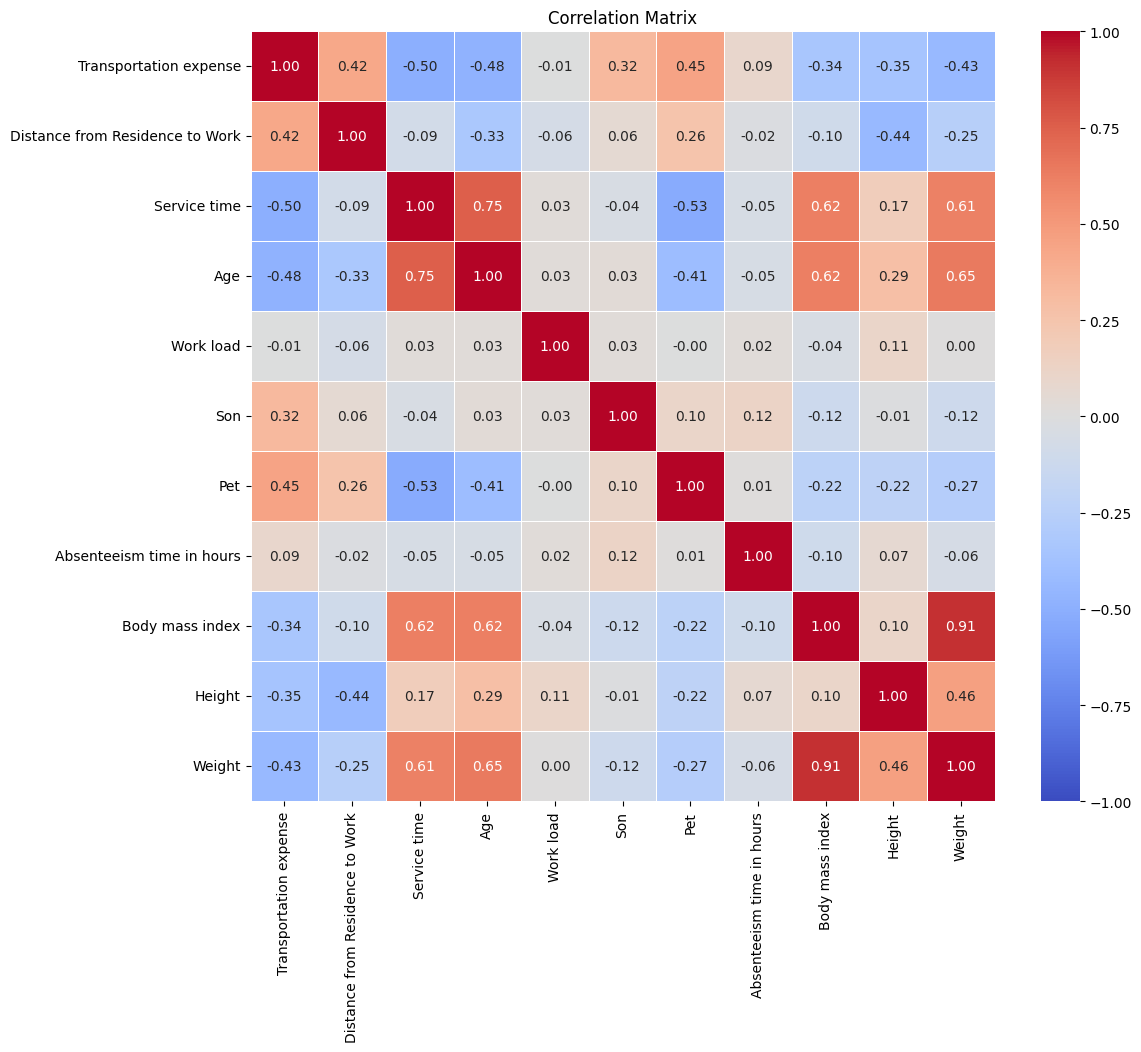

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
selected_columns = df.loc[:, ['Transportation expense', 'Distance from Residence to Work',
                              'Service time', 'Age', 'Work load', 'Son', 'Pet',
                              'Absenteeism time in hours', 'Body mass index',
                              'Height', 'Weight']]

# correlation matrix
correlation_matrix = selected_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, 
            annot=True, cmap='coolwarm', 
            fmt='.2f', linewidths=.5, 
            vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


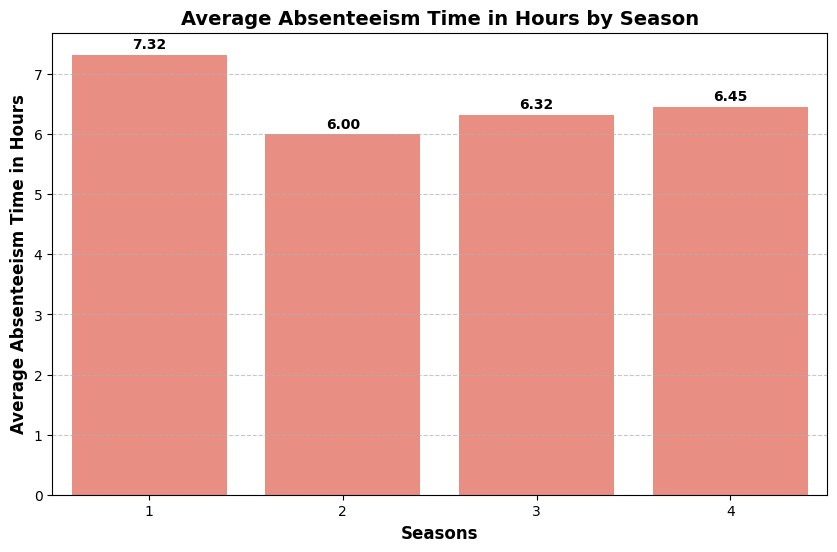

In [ ]:
filename = "aftercleaning.csv"
df = pd.read_csv(filename)  # Load Dataset

# Calculate average Absenteeism time in hours for each season
average_absenteeism_time_by_season = df.groupby('Seasons')['Absenteeism time in hours'].mean().reset_index()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Seasons',
    y='Absenteeism time in hours',
    data=average_absenteeism_time_by_season,
    color='salmon'
)

plt.title('Average Absenteeism Time in Hours by Season', fontsize=14, weight='bold')
plt.xlabel('Seasons', fontsize=12, weight='bold')
plt.ylabel('Average Absenteeism Time in Hours', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for i, row in average_absenteeism_time_by_season.iterrows():
    plt.text(i, row['Absenteeism time in hours'] + 0.1, f'{row["Absenteeism time in hours"]:.2f}', 
             ha='center', fontsize=10, weight='bold')

plt.show()

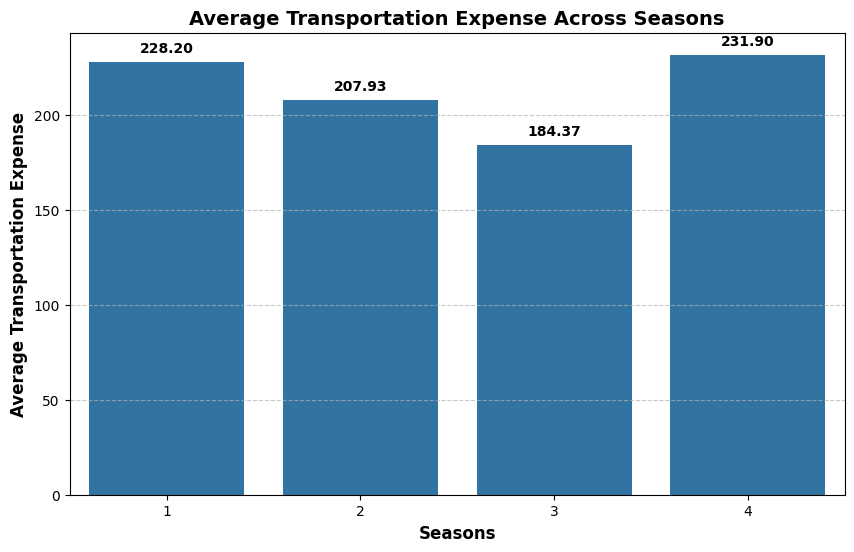

In [ ]:
filename = "aftercleaning.csv"
df = pd.read_csv(filename)  # Load Dataset

# Calculate average transportation expense for each season
avg_TE = df.groupby('Seasons')['Transportation expense'].mean().reset_index()

# Plot the bar chart 
plt.figure(figsize=(10, 6))  
sns.barplot(
    x='Seasons',
    y='Transportation expense',
    data=avg_TE,
    legend=False
)

# Set title and labels
plt.title("Average Transportation Expense Across Seasons", fontsize=14, weight='bold')
plt.xlabel("Seasons", fontsize=12, weight='bold')
plt.ylabel("Average Transportation Expense", fontsize=12, weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numbers on top of the bars
for i, row in avg_TE.iterrows():
    plt.text(i, row['Transportation expense'] + 5, f'{row["Transportation expense"]:.2f}', 
             ha='center', fontsize=10, weight='bold')

plt.show()


In [ ]:
filename = "aftercleaning.csv"
df = pd.read_csv(filename)  # Load Dataset

unique_months_per_season = df.groupby('Seasons')['Month of absence'].unique()
unique_months_per_season

Seasons
1       [7.0, 8.0, 9.0, 6.0]
2      [12.0, 1.0, 2.0, 3.0]
3       [3.0, 4.0, 5.0, 6.0]
4    [9.0, 10.0, 11.0, 12.0]
Name: Month of absence, dtype: object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb12a72b-c713-451a-876b-3f5d93d5f7a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>